In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load the California Housing dataset
# The fetch_california_housing() function from sklearn.datasets is used to load the dataset.

california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
# Check for missing values
# checking for missing values using df.isnull().sum(),there are no missing values in this dataset

print("Missing values:")
print(df.isnull().sum())

Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [5]:
# Feature Scaling
# To bring all features to a uniform scale, Standardization is applied, which transforms the features to have a mean of 0 and a standard deviation of 1.
# This is essential for machine learning algorithms like Linear Regression, Support Vector Regression (SVR), and Gradient Boosting.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Target']))
X = pd.DataFrame(scaled_features, columns=california.feature_names)
y = df['Target']

In [6]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 1.Linear Regression models the relationship between input features and the target variable using a straight-line equation.
# 2.Decision Tree: Tt creates a tree where each node represents a feature and branches split based on feature values to make predictions.
# 3. Random Forest: It is an ensemble learning method that creates multiple Decision Trees and averages their outputs to improve stability and
    #reduce overfitting.
# 4.Gradient Boosting: It builds Decision Trees sequentially, where each tree learns from the previous tree’s errors using gradient descent optimization.
# 5.Support Vector: SVR attempts to find a function that best fits the data while keeping most predictions within a margin of the true values.

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100),
    "Support Vector Regressor": SVR()
}
results = {}

In [8]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "MAE": mae, "R**": r2}

In [9]:
results_df = pd.DataFrame(results).T

In [10]:
# Display the results
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                               MSE       MAE       R**
Linear Regression         0.555892  0.533200  0.575788
Decision Tree             0.494272  0.453784  0.622811
Random Forest             0.255498  0.327613  0.805024
Gradient Boosting         0.293999  0.371650  0.775643
Support Vector Regressor  0.355198  0.397763  0.728941


<Figure size 1000x500 with 0 Axes>

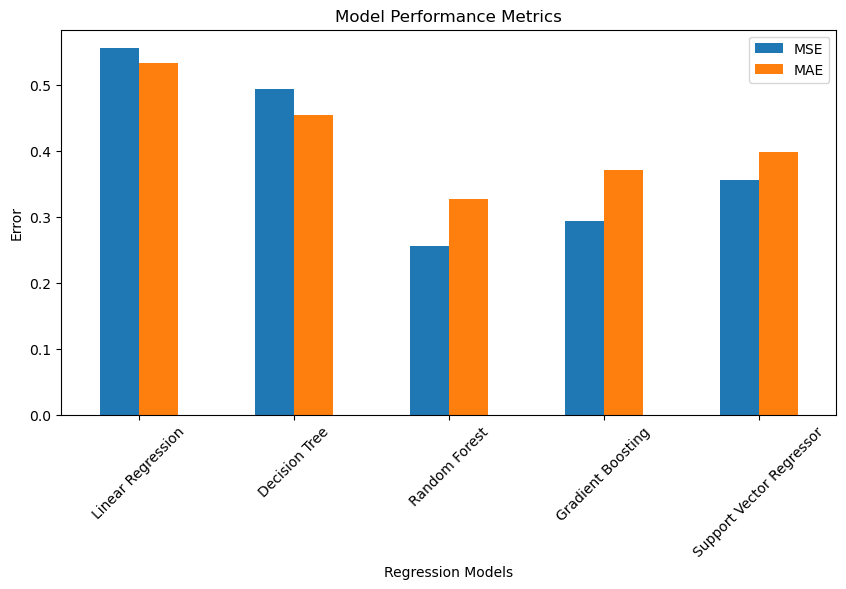

In [11]:
# Plot model performance
plt.figure(figsize=(10, 5))
results_df[['MSE', 'MAE']].plot(kind='bar', figsize=(10, 5), title='Model Performance Metrics')
plt.ylabel("Error")
plt.xlabel("Regression Models")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [12]:
best_model = results_df.sort_values(by=["R**", "MSE", "MAE"], ascending=[False, True, True]).index[0]
worst_model = results_df.sort_values(by=["R**", "MSE", "MAE"], ascending=[True, False, False]).index[0]

In [13]:
print(f"Best Performing Model: {best_model}")
print(f"Worst Performing Model: {worst_model}")

Best Performing Model: Random Forest
Worst Performing Model: Linear Regression


#Random Forest is the best performing model as it has the lowest error values (MSE & MAE) and the highest R Square score.

#Linear Regression is the worst performing model as it has the highest error values (MSE & MAE) and the lowest R Square score.